# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
# from api_keys import weather_api_key

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [107]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [109]:
# Loop through city list and pull weather data for each city 
# Do api call to get weather data
# create empty columns to store info in a dataframe 
# print process recording of what record and set and city 
# Create empty lists for data
city=[]
lat=[]
lon=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]


for city_name in cities:      # http://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=c9fb60baea4a0d36add4201be947f8a4
    try: 
        response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}&units=Imperial").json()
        city.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(city_name)
    except: 
        print("City not found. Skipping...")
        pass 
    
        # pprint(response)

dikson
lagoa
rikitea
ushuaia
punta arenas
hilo
longyearbyen
City not found. Skipping...
dunda
upington
vaini
port alfred
saint-pierre
shimoda
janakpur
avarua
zapolyarnyy
faya
lebu
castro
albany
jamestown
pevek
butaritari
severnyy
bluff
City not found. Skipping...
mataura
busselton
provideniya
ribeira grande
City not found. Skipping...
port lincoln
bredasdorp
City not found. Skipping...
marsh harbour
City not found. Skipping...
tual
City not found. Skipping...
mount isa
upernavik
acajutla
ponta do sol
zhangye
chernyshevskiy
airai
green river
barrow
gejiu
cabedelo
atuona
City not found. Skipping...
hamilton
carnarvon
nemuro
yellowknife
bria
kaitangata
lompoc
haines junction
zaysan
mar del plata
nauta
ostrovnoy
kulykivka
hithadhoo
bethel
thayetmyo
hobart
pervomayskiy
City not found. Skipping...
victoria
hortolandia
ziarat
arlit
clyde river
chokurdakh
petrivka
edgewater
bubaque
ancud
cabo san lucas
nikolskoye
City not found. Skipping...
chuy
tabas
zhigansk
iqaluit
rocha
kodiak
praia da vit

In [110]:
# Check to see that length of columns is even
len(city)

573

In [111]:
# Check to see that length of columns is even
len(lat)

573

In [112]:
# Check to see that length of columns is even
len(lon)

573

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [113]:
# Create dataframe columns using info from API call 
city_df= pd.DataFrame ({
    "City": city,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})
city_df

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0            Dikson  73.5069   80.5464    -34.28        80           0   
1             Lagoa  39.0500  -27.9833     61.90        94         100   
2           Rikitea -23.1203 -134.9692     79.50        70           0   
3           Ushuaia -54.8000  -68.3000     51.80        62          20   
4      Punta Arenas -53.1500  -70.9167     51.80        62           0   
..              ...      ...       ...       ...       ...         ...   
568        Zarubino  42.6300  131.0922      8.17        84          76   
569          Paihia -35.2822  174.0912     73.00        56           0   
570  Kulhudhuffushi   6.6221   73.0700     81.32        66           1   
571         Chapais  49.7834  -74.8492     -4.00        77          90   
572   San Cristobal   7.7669  -72.2250     65.71        72          84   

     Wind Speed Country        Date  
0          6.85      RU  1612053325  
1         25.64      PT  1612053391  
2         11.34      PF  1612053307  
3         21.85      AR  1612053316  
4         26.46      CL  1612053538  
..          ...     ...         ...  
568        4.63      RU  1612053643  
569       11.01      NZ  1612053352  
570        5.55      MV  1612053644  
571        6.91      CA  1612053382  
572        1.39      VE  1612053403  

[573 rows x 9 columns]

In [116]:
# Export dataframe to CSV file
city_df.to_csv('WeatherPY3.csv', index = None) 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [114]:
humidity_drop=city_df[(city_df["Humidity"]>100)]
humidity_drop

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []

In [44]:
#  Get the indices of cities that have humidity over 100%.
# N/A 

In [115]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# N/A

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature (01/28/21)')

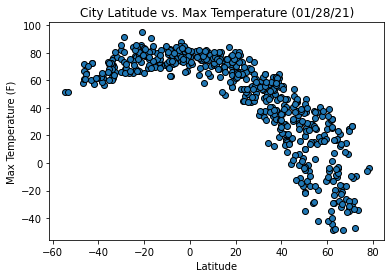

In [117]:
plt.scatter(lat, max_temp, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (01/28/21)')


#city_df.plt(kind='scatter', x='Lat', y='Max Temp')

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity (01/28/21)')

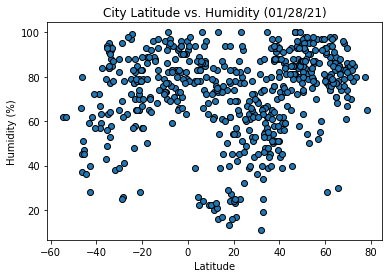

In [121]:
plt.scatter(lat, humidity, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (01/28/21)')

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness (01/28/21)')

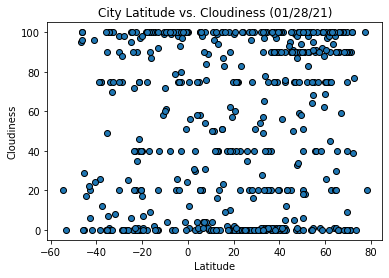

In [122]:
plt.scatter(lat, cloudiness, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (01/28/21)')

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (01/28/21)')

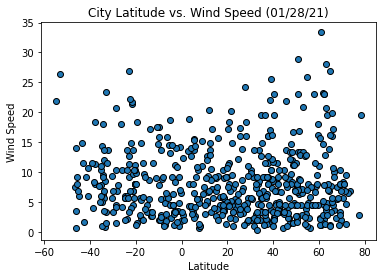

In [123]:
plt.scatter(lat, wind_speed, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (01/28/21)')


## Linear Regression

In [124]:
# Need to separate df into northern and southern hemisphere
# Cities found at latitude greater than 0 are in the Northern hemisphere
northern_hemisphere=city_df[city_df["Lat"]>=0]
northern_hemisphere

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0            Dikson  73.5069   80.5464    -34.28        80           0   
1             Lagoa  39.0500  -27.9833     61.90        94         100   
5              Hilo  19.7297 -155.0900     80.60        54          75   
6      Longyearbyen  78.2186   15.6401     -4.00        65          20   
12          Shimoda  34.6667  138.9500     50.00        62          20   
..              ...      ...       ...       ...       ...         ...   
567            Jurm  36.8648   70.8342     38.16        61         100   
568        Zarubino  42.6300  131.0922      8.17        84          76   
570  Kulhudhuffushi   6.6221   73.0700     81.32        66           1   
571         Chapais  49.7834  -74.8492     -4.00        77          90   
572   San Cristobal   7.7669  -72.2250     65.71        72          84   

     Wind Speed Country        Date  
0          6.85      RU  1612053325  
1         25.64      PT  1612053391  
5          9.22      US  1612053539  
6         19.57      SJ  1612053340  
12         5.75      JP  1612053453  
..          ...     ...         ...  
567        6.04      AF  1612053643  
568        4.63      RU  1612053643  
570        5.55      MV  1612053644  
571        6.91      CA  1612053382  
572        1.39      VE  1612053403  

[400 rows x 9 columns]

In [125]:
# Cities found at latitude greater than 0 are in the Northern hemisphere
southern_hemisphere=city_df[city_df["Lat"]<=0]
southern_hemisphere

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
2               Rikitea -23.1203 -134.9692     79.50        70           0   
3               Ushuaia -54.8000  -68.3000     51.80        62          20   
4          Punta Arenas -53.1500  -70.9167     51.80        62           0   
7                 Dunda  -8.1167   34.2500     63.03        94         100   
8              Upington -28.4478   21.2561     68.00        26           0   
..                  ...      ...       ...       ...       ...         ...   
543        Constitución -35.3333  -72.4167     60.30        93          49   
546          Dargaville -35.9333  173.8833     73.47        43           0   
561        Sungai Penuh  -2.0833  101.3833     66.20        90         100   
566  Comodoro Rivadavia -45.8667  -67.5000     60.80        51           0   
569              Paihia -35.2822  174.0912     73.00        56           0   

     Wind Speed Country        Date  
2         11.34      PF  1612053307  
3         21.85      AR  1612053316  
4         26.46      CL  1612053538  
7          1.95      TZ  1612053539  
8          4.61      ZA  1612053539  
..          ...     ...         ...  
543        7.85      CL  1612053346  
546        7.72      NZ  1612053639  
561        1.74      ID  1612053642  
566        8.05      AR  1612053596  
569       11.01      NZ  1612053352  

[173 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7351113753678886


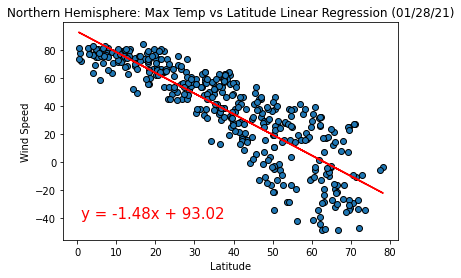

In [126]:
# Use the Northern Hemisphere dataframe to generate a scatter plot 
n_lat = northern_hemisphere['Lat']
max_temp = northern_hemisphere['Max Temp']
plt.scatter(n_lat,max_temp, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Max Temp vs Latitude Linear Regression (01/28/21)')
# plt.show()

# Perform linear regression on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, max_temp)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (1,-40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.plot(n_lat,regress_values,"r-")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3110030297583685


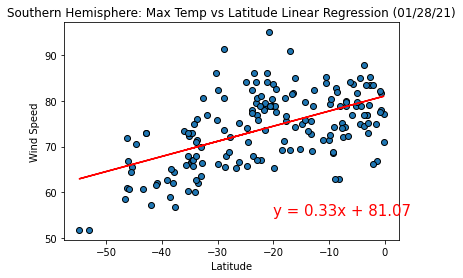

In [138]:
# Use the Southern Hemisphere dataframe to generate a scatter plot 
s_lat = southern_hemisphere['Lat']
s_max_temp = southern_hemisphere['Max Temp']
plt.scatter(s_lat,s_max_temp, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Max Temp vs Latitude Linear Regression (01/28/21)')
# plt.show()

# Perform linear regression on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_max_temp)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-20, 55),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.plot(s_lat,regress_values,"r-")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10945775800679719


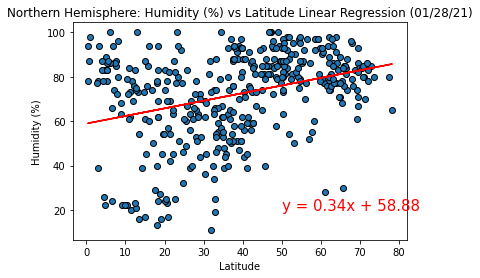

In [128]:
# Use the Northern Hemisphere dataframe to generate a scatter plot 
n_lat = northern_hemisphere['Lat']
n_hum = northern_hemisphere['Humidity']
plt.scatter(n_lat,n_hum, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Humidity (%) vs Latitude Linear Regression (01/28/21)')
# plt.show()

# Perform linear regression on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_hum)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (50, 20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.plot(n_lat,regress_values,"r-")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18008421738256492


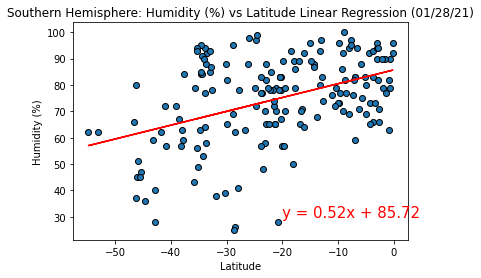

In [136]:
# Use the Southern Hemisphere dataframe to generate a scatter plot 
s_lat = southern_hemisphere['Lat']
s_hum = southern_hemisphere['Humidity']
plt.scatter(s_lat,s_hum, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity (%) vs Latitude Linear Regression (01/28/21)')
# plt.show()

# Perform linear regression on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_hum)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-20,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.plot(s_lat,regress_values,"r-")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07754135047102007


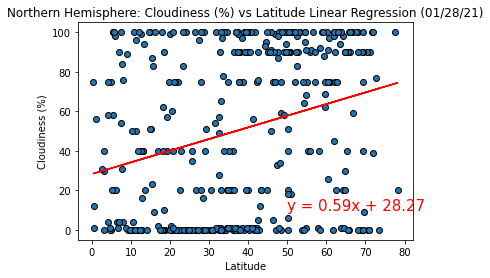

In [130]:
# Use the Northern Hemisphere dataframe to generate a scatter plot 
n_lat = northern_hemisphere['Lat']
n_cloud = northern_hemisphere['Cloudiness']
plt.scatter(n_lat,n_cloud, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Cloudiness (%) vs Latitude Linear Regression (01/28/21)')
# plt.show()

# Perform linear regression on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloud)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (50, 10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.plot(n_lat,regress_values,"r-")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10133913250778809


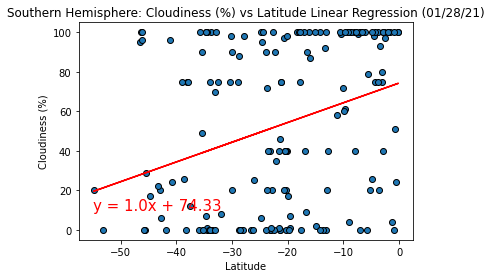

In [131]:
# Use the Southern Hemisphere dataframe to generate a scatter plot 
s_lat = southern_hemisphere['Lat']
s_cloud = southern_hemisphere['Cloudiness']
plt.scatter(s_lat,s_cloud, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Cloudiness (%) vs Latitude Linear Regression (01/28/21)')
# plt.show()

# Perform linear regression on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloud)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-55,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.plot(s_lat,regress_values,"r-")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003942621372962136


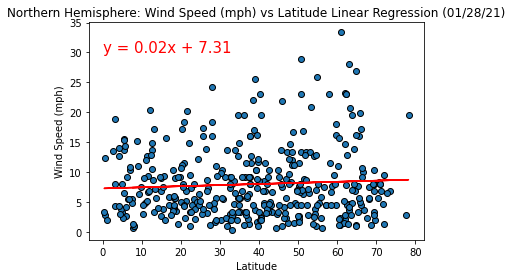

In [133]:
# Use the Northern Hemisphere dataframe to generate a scatter plot 
n_lat = northern_hemisphere['Lat']
n_wind = northern_hemisphere['Wind Speed']
plt.scatter(n_lat,n_wind, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere: Wind Speed (mph) vs Latitude Linear Regression (01/28/21)')
# plt.show()

# Perform linear regression on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (0,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.plot(n_lat,regress_values,"r-")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.035349712452280156


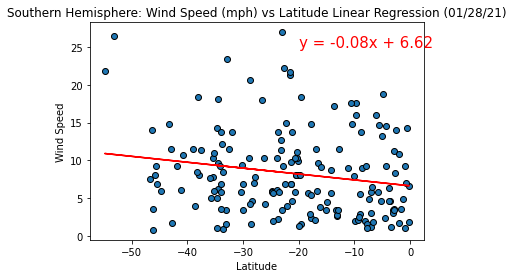

In [135]:
# Use the Southern Hemisphere dataframe to generate a scatter plot 
s_lat = southern_hemisphere['Lat']
s_wind = southern_hemisphere['Wind Speed']
plt.scatter(s_lat,s_wind, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Wind Speed (mph) vs Latitude Linear Regression (01/28/21)')
# plt.show()

# Perform linear regression on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_wind)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-20,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.plot(s_lat,regress_values,"r-")

In [ ]:

# plt.scatter(x_values,y_values)
# Set formula for linear regression and overlay on scatterplot 
# slp, intpt, r, p, ste=linregress(n_lat, max_temp)
#x=np.arange[n_lat]
#"x=np.arange[n_lat]
#y_pred=(x*slp)+intpt
#plt.plot(x,y_pred, c="r")
#plt.plot(n_lat, max_temp)
# plt.scatter(x_values, y_values)
#plt.annotate("Y=mx+b", (3, 45), c="g")

In [37]:
# cities[1]
# print(response)
# print(lat)
# city=[]
#     lat=[]
#     lon=[]
#     max_temp=[]
#     humidity=[]
#     cloudiness=[]
#     wind_speed=[]
#     country=[]
#     date=[]
#   "% Passing Reading": [reading_pass_percent],
#     "% Overall Passing": [overall_pass_percent]